In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

In [3]:
loan_df = pd.read_csv("../Resources/accepted2.csv")

loan_df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,6500,36 months,9.75,208.98,3 years,RENT,80000.0,Not Verified,Fully Paid,n,...,0.0,1.0,95.8,100.0,1.0,0.0,32332.0,14444.0,3800.0,16732.0
1,4000,36 months,6.83,123.20,6 years,RENT,30000.0,Not Verified,Current,n,...,0.0,1.0,88.5,0.0,0.0,0.0,74521.0,79942.0,3700.0,66821.0
2,20000,36 months,9.17,637.58,10+ years,RENT,80000.0,Source Verified,Fully Paid,n,...,0.0,1.0,100.0,100.0,0.0,0.0,18000.0,15208.0,16000.0,0.0
3,15000,60 months,15.61,361.67,10+ years,RENT,45000.0,Verified,Fully Paid,n,...,0.0,0.0,100.0,100.0,1.0,3.0,42638.0,23022.0,14400.0,27029.0
4,24000,60 months,15.59,578.42,9 years,MORTGAGE,64000.0,Source Verified,Current,n,...,0.0,3.0,95.1,75.0,0.0,0.0,208862.0,127502.0,15400.0,109688.0


In [4]:
len(loan_df)

106998

In [5]:
loan_df.emp_length.unique()

array(['3 years', '6 years', '10+ years', '9 years', '4 years', '7 years',
       '< 1 year', '1 year', '5 years', '8 years', nan, '2 years'],
      dtype=object)

In [6]:
len(loan_df['emp_length'].dropna())/len(loan_df)

0.9392885848333614

In [7]:
emp_na_index= np.where(loan_df['emp_length'].isna())[0]

df_dr_emp_na = loan_df.drop(emp_na_index, axis=0)
df_dr_emp_na = df_dr_emp_na.reset_index(drop=True)
df_dr_emp_na


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,6500,36 months,9.75,208.98,3 years,RENT,80000.0,Not Verified,Fully Paid,n,...,0.0,1.0,95.8,100.0,1.0,0.0,32332.0,14444.0,3800.0,16732.0
1,4000,36 months,6.83,123.20,6 years,RENT,30000.0,Not Verified,Current,n,...,0.0,1.0,88.5,0.0,0.0,0.0,74521.0,79942.0,3700.0,66821.0
2,20000,36 months,9.17,637.58,10+ years,RENT,80000.0,Source Verified,Fully Paid,n,...,0.0,1.0,100.0,100.0,0.0,0.0,18000.0,15208.0,16000.0,0.0
3,15000,60 months,15.61,361.67,10+ years,RENT,45000.0,Verified,Fully Paid,n,...,0.0,0.0,100.0,100.0,1.0,3.0,42638.0,23022.0,14400.0,27029.0
4,24000,60 months,15.59,578.42,9 years,MORTGAGE,64000.0,Source Verified,Current,n,...,0.0,3.0,95.1,75.0,0.0,0.0,208862.0,127502.0,15400.0,109688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100497,10925,36 months,16.14,384.85,10+ years,RENT,165000.0,Source Verified,Current,n,...,0.0,4.0,100.0,9.1,1.0,0.0,201398.0,95829.0,52100.0,113098.0
100498,10000,36 months,6.67,307.27,< 1 year,OWN,34655.0,Source Verified,Current,n,...,0.0,1.0,100.0,100.0,0.0,0.0,16100.0,10380.0,6000.0,0.0
100499,13000,36 months,12.13,432.60,< 1 year,MORTGAGE,150000.0,Source Verified,Current,n,...,0.0,1.0,87.0,37.5,0.0,0.0,113278.0,96342.0,10600.0,81978.0
100500,7000,36 months,8.46,220.85,10+ years,MORTGAGE,75000.0,Source Verified,Current,n,...,0.0,1.0,85.0,0.0,0.0,0.0,35883.0,20459.0,9650.0,16793.0


In [8]:
most_na_list = df_dr_emp_na.isna().sum() / len(df_dr_emp_na)

In [9]:
drop_list = []
for i in range(len(most_na_list)):
    if(most_na_list[i] > .05):
        
        print(f'{str(most_na_list.index[i]):<40} {str(most_na_list[i])}')
        drop_list.append(str(most_na_list.index[i]))
        
print()
print(drop_list)

mths_since_last_delinq                   0.5072635370440389
mths_since_last_record                   0.8432071003562118
annual_inc_joint                         1.0
dti_joint                                1.0
mo_sin_old_il_acct                       0.06113311177887007
mths_since_recent_inq                    0.13113171877176574
num_tl_120dpd_2m                         0.07321247338361425

['mths_since_last_delinq', 'mths_since_last_record', 'annual_inc_joint', 'dti_joint', 'mo_sin_old_il_acct', 'mths_since_recent_inq', 'num_tl_120dpd_2m']


In [10]:
 pd.isnull(loan_df['emp_length']).any(0)


True

In [11]:
int_predict_df = df_dr_emp_na.drop(drop_list, axis = 1)
int_predict_df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,6500,36 months,9.75,208.98,3 years,RENT,80000.0,Not Verified,Fully Paid,n,...,0.0,1.0,95.8,100.0,1.0,0.0,32332.0,14444.0,3800.0,16732.0
1,4000,36 months,6.83,123.20,6 years,RENT,30000.0,Not Verified,Current,n,...,0.0,1.0,88.5,0.0,0.0,0.0,74521.0,79942.0,3700.0,66821.0
2,20000,36 months,9.17,637.58,10+ years,RENT,80000.0,Source Verified,Fully Paid,n,...,0.0,1.0,100.0,100.0,0.0,0.0,18000.0,15208.0,16000.0,0.0
3,15000,60 months,15.61,361.67,10+ years,RENT,45000.0,Verified,Fully Paid,n,...,0.0,0.0,100.0,100.0,1.0,3.0,42638.0,23022.0,14400.0,27029.0
4,24000,60 months,15.59,578.42,9 years,MORTGAGE,64000.0,Source Verified,Current,n,...,0.0,3.0,95.1,75.0,0.0,0.0,208862.0,127502.0,15400.0,109688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100497,10925,36 months,16.14,384.85,10+ years,RENT,165000.0,Source Verified,Current,n,...,0.0,4.0,100.0,9.1,1.0,0.0,201398.0,95829.0,52100.0,113098.0
100498,10000,36 months,6.67,307.27,< 1 year,OWN,34655.0,Source Verified,Current,n,...,0.0,1.0,100.0,100.0,0.0,0.0,16100.0,10380.0,6000.0,0.0
100499,13000,36 months,12.13,432.60,< 1 year,MORTGAGE,150000.0,Source Verified,Current,n,...,0.0,1.0,87.0,37.5,0.0,0.0,113278.0,96342.0,10600.0,81978.0
100500,7000,36 months,8.46,220.85,10+ years,MORTGAGE,75000.0,Source Verified,Current,n,...,0.0,1.0,85.0,0.0,0.0,0.0,35883.0,20459.0,9650.0,16793.0


In [12]:
len(int_predict_df.dropna())

95137

In [13]:
int_predict_df = int_predict_df.dropna().reset_index(drop=True)
int_predict_df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,6500,36 months,9.75,208.98,3 years,RENT,80000.0,Not Verified,Fully Paid,n,...,0.0,1.0,95.8,100.0,1.0,0.0,32332.0,14444.0,3800.0,16732.0
1,4000,36 months,6.83,123.20,6 years,RENT,30000.0,Not Verified,Current,n,...,0.0,1.0,88.5,0.0,0.0,0.0,74521.0,79942.0,3700.0,66821.0
2,20000,36 months,9.17,637.58,10+ years,RENT,80000.0,Source Verified,Fully Paid,n,...,0.0,1.0,100.0,100.0,0.0,0.0,18000.0,15208.0,16000.0,0.0
3,15000,60 months,15.61,361.67,10+ years,RENT,45000.0,Verified,Fully Paid,n,...,0.0,0.0,100.0,100.0,1.0,3.0,42638.0,23022.0,14400.0,27029.0
4,24000,60 months,15.59,578.42,9 years,MORTGAGE,64000.0,Source Verified,Current,n,...,0.0,3.0,95.1,75.0,0.0,0.0,208862.0,127502.0,15400.0,109688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95132,10925,36 months,16.14,384.85,10+ years,RENT,165000.0,Source Verified,Current,n,...,0.0,4.0,100.0,9.1,1.0,0.0,201398.0,95829.0,52100.0,113098.0
95133,10000,36 months,6.67,307.27,< 1 year,OWN,34655.0,Source Verified,Current,n,...,0.0,1.0,100.0,100.0,0.0,0.0,16100.0,10380.0,6000.0,0.0
95134,13000,36 months,12.13,432.60,< 1 year,MORTGAGE,150000.0,Source Verified,Current,n,...,0.0,1.0,87.0,37.5,0.0,0.0,113278.0,96342.0,10600.0,81978.0
95135,7000,36 months,8.46,220.85,10+ years,MORTGAGE,75000.0,Source Verified,Current,n,...,0.0,1.0,85.0,0.0,0.0,0.0,35883.0,20459.0,9650.0,16793.0


In [14]:
# bins = [0,  10.5, 14.4, 100]
bins = [0,12.5,100]
int_predict_df['int_binned'] = pd.cut(int_predict_df['int_rate'], bins)
int_predict_df.head(10)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,int_binned
0,6500,36 months,9.75,208.98,3 years,RENT,80000.0,Not Verified,Fully Paid,n,...,1.0,95.8,100.0,1.0,0.0,32332.0,14444.0,3800.0,16732.0,"(0.0, 12.5]"
1,4000,36 months,6.83,123.20,6 years,RENT,30000.0,Not Verified,Current,n,...,1.0,88.5,0.0,0.0,0.0,74521.0,79942.0,3700.0,66821.0,"(0.0, 12.5]"
2,20000,36 months,9.17,637.58,10+ years,RENT,80000.0,Source Verified,Fully Paid,n,...,1.0,100.0,100.0,0.0,0.0,18000.0,15208.0,16000.0,0.0,"(0.0, 12.5]"
3,15000,60 months,15.61,361.67,10+ years,RENT,45000.0,Verified,Fully Paid,n,...,0.0,100.0,100.0,1.0,3.0,42638.0,23022.0,14400.0,27029.0,"(12.5, 100.0]"
4,24000,60 months,15.59,578.42,9 years,MORTGAGE,64000.0,Source Verified,Current,n,...,3.0,95.1,75.0,0.0,0.0,208862.0,127502.0,15400.0,109688.0,"(12.5, 100.0]"
5,40000,60 months,10.47,859.17,10+ years,MORTGAGE,180000.0,Source Verified,Current,n,...,2.0,100.0,0.0,0.0,0.0,287749.0,73574.0,29200.0,47459.0,"(0.0, 12.5]"
6,2500,36 months,12.49,83.63,4 years,MORTGAGE,51000.0,Not Verified,Fully Paid,n,...,1.0,76.6,100.0,0.0,0.0,203609.0,56537.0,5500.0,56705.0,"(0.0, 12.5]"
7,9600,36 months,7.89,300.35,10+ years,MORTGAGE,104000.0,Not Verified,Fully Paid,n,...,2.0,100.0,0.0,0.0,0.0,396058.0,49524.0,35800.0,71511.0,"(0.0, 12.5]"
8,12000,36 months,9.75,385.80,4 years,MORTGAGE,80000.0,Not Verified,Fully Paid,n,...,2.0,100.0,0.0,0.0,0.0,236344.0,36829.0,18100.0,37544.0,"(0.0, 12.5]"
9,7000,36 months,15.05,242.83,6 years,RENT,150000.0,Not Verified,Current,n,...,3.0,91.2,0.0,0.0,0.0,91368.0,54963.0,19500.0,33544.0,"(12.5, 100.0]"


In [15]:
int_predict_df['int_binned'].value_counts()

(12.5, 100.0]    48394
(0.0, 12.5]      46743
Name: int_binned, dtype: int64

# Start setting up model

In [16]:
model_int_setup = int_predict_df.drop(['int_rate', 'installment'], axis=1)

In [17]:
model_int_setup['emp_length'] = model_int_setup['emp_length'].replace('< 1 year', 0.5).replace('10+ years', 10).\
replace('2 years', 2).replace('3 years', 3).replace('1 year', 1).replace('4 years', 4).replace('5 years', 5).\
replace('6 years', 6).replace('7 years', 7).replace('8 years', 8).replace('8 years', 8).replace('9 years', 9)

In [18]:
model_int_setup = model_int_setup.astype({
    'emp_length': int
})

In [19]:
model_int_setup['emp_length'].value_counts()

10    33815
2      9179
3      8202
0      7877
1      6707
4      6301
5      6216
6      4622
7      4376
8      4186
9      3656
Name: emp_length, dtype: int64

In [20]:
loan_title_list = model_int_setup['title'].value_counts()

In [21]:

for i in range(len(loan_title_list)):
    if(loan_title_list[i] > .05):
        
        print(f'{str(loan_title_list.index[i]):<40} {str(loan_title_list[i])}')
#         drop_list.append(str(most_na_list.index[i]))

Debt consolidation                       50341
Credit card refinancing                  20878
Home improvement                         5828
Other                                    5449
Major purchase                           1971
Medical expenses                         1044
Business                                 936
Car financing                            880
Vacation                                 596
Debt Consolidation                       568
Moving and relocation                    544
Home buying                              538
Consolidation                            209
debt consolidation                       154
Credit Card Consolidation                95
consolidation                            67
Personal Loan                            66
Consolidation Loan                       64
Home Improvement                         63
Debt Consolidation Loan                  60
Credit Card Refinance                    57
Green loan                               55
Credit Car

Consolidate Loans and to get score up    1
Eliminate Home Equity Loan               1
Home fixer                               1
Student & Medical                        1
Debt Consolatation                       1
Debt Free Please                         1
Home project                             1
Finance consolidation                    1
Financial Freedom Debt Consolidation     1
flooring                                 1
Consolidated Debt reduction              1
homefree                                 1
Debt Consolidation Payoff 401k Loan      1
please help                              1
halloween                                1
Principal down, PMI out                  1
Timeshare Payoff                         1
Surgery Expense                          1
Debt Consolidation, starting fresh       1
Improving my debit                       1
loanme                                   1
Fresh start - pay down credit cards      1
One Bill a Month                         1
luckyloan  

In [22]:
model_int_setup = model_int_setup.drop('title', axis=1)

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
model_int_setup.head()

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,int_binned
0,6500,36 months,3,RENT,80000.0,Not Verified,Fully Paid,n,930xx,CA,9.17,0.0,675,679,0.0,8.0,1.0,5965,38.2,31.0,w,0.00,0.00,6786.02000,6786.02,6500.00,286.02,0.00,0.0,0.0,5938.55,729,725,0.0,0.0,0.0,14444.0,15600.0,1,4,1,3.0,2063.0,188.0,95.1,0.0,0.0,175.0,24.0,4.0,0.0,68.0,72,72,1.0,1.0,3.0,1.0,12.0,12.0,6.0,19.0,3.0,7.0,0.0,0.0,1.0,95.8,100.0,1.0,0.0,32332.0,14444.0,3800.0,16732.0,"(0.0, 12.5]"
1,4000,36 months,6,RENT,30000.0,Not Verified,Current,n,306xx,GA,15.68,0.0,695,699,1.0,16.0,0.0,2603,33.8,26.0,w,3075.25,3075.25,1105.76000,1105.76,924.75,181.01,0.00,0.0,0.0,123.20,689,685,0.0,0.0,350.0,79942.0,7700.0,0,0,1,2.0,4996.0,2358.0,36.3,0.0,0.0,171.0,2.0,2.0,0.0,133.0,-1,-1,1.0,1.0,2.0,1.0,2.0,20.0,3.0,6.0,2.0,16.0,0.0,0.0,1.0,88.5,0.0,0.0,0.0,74521.0,79942.0,3700.0,66821.0,"(0.0, 12.5]"
2,20000,36 months,10,RENT,80000.0,Source Verified,Fully Paid,n,740xx,OK,6.41,0.0,690,694,1.0,4.0,0.0,15208,84.5,6.0,f,0.00,0.00,22974.52785,22687.35,20000.00,2974.53,0.00,0.0,0.0,637.51,704,700,0.0,0.0,0.0,15208.0,18000.0,-1,-1,-1,1.0,3802.0,1207.0,92.5,0.0,0.0,252.0,6.0,6.0,0.0,59.0,-1,-1,0.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,18000.0,15208.0,16000.0,0.0,"(0.0, 12.5]"
3,15000,60 months,10,RENT,45000.0,Verified,Fully Paid,n,432xx,OH,23.57,0.0,660,664,0.0,9.0,4.0,13995,89.7,19.0,w,0.00,0.00,21700.18758,21700.19,15000.00,6700.19,0.00,0.0,0.0,361.66,674,670,0.0,0.0,0.0,23022.0,15609.0,-1,-1,-1,2.0,2558.0,982.0,93.2,0.0,0.0,102.0,21.0,21.0,0.0,21.0,-1,-1,0.0,5.0,7.0,5.0,6.0,9.0,7.0,10.0,7.0,9.0,0.0,0.0,0.0,100.0,100.0,1.0,3.0,42638.0,23022.0,14400.0,27029.0,"(12.5, 100.0]"
4,24000,60 months,9,MORTGAGE,64000.0,Source Verified,Current,n,460xx,IN,25.86,0.0,665,669,1.0,14.0,0.0,16109,75.6,43.0,f,5902.06,5902.06,28350.71000,28350.71,18097.94,10223.85,28.92,0.0,0.0,578.42,634,630,0.0,0.0,91.0,200852.0,21300.0,-1,-1,-1,11.0,18259.0,2152.0,86.0,0.0,0.0,137.0,1.0,1.0,3.0,6.0,69,69,1.0,4.0,8.0,5.0,6.0,25.0,11.0,15.0,8.0,14.0,0.0,0.0,3.0,95.1,75.0,0.0,0.0,208862.0,127502.0,15400.0,109688.0,"(12.5, 100.0]"


In [25]:
model_int_setup = model_int_setup.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','zip_code','addr_state'], axis=1)

In [26]:
X = model_int_setup.drop(['loan_status', 'home_ownership','pymnt_plan','loan_status','delinq_amnt','tax_liens','total_rec_late_fee','fico_range_low','last_fico_range_high','last_fico_range_low'], axis=1)

In [27]:
model_int_setup = model_int_setup[['term', 'fico_range_high', 'bc_open_to_buy','dti','bc_util','total_bc_limit', 'revol_util','total_rev_hi_lim', 'annual_inc', 'loan_amnt','mo_sin_old_rev_tl_op','tot_hi_cred_lim','revol_bal','int_binned']]

In [28]:
X = model_int_setup.drop('int_binned', axis=1)
y = model_int_setup['int_binned']

In [29]:
X = pd.get_dummies(X)

In [30]:
y = pd.get_dummies(y)

In [31]:
y = y.drop([1], axis=1)

In [32]:
y

,"(12.5, 100.0]"
0,0
1,0
2,0
3,1
4,1
...,...
95132,1
95133,0
95134,0
95135,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
classifier = LogisticRegression()


In [35]:
classifier.fit(X_train_scaled,y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.721801771499047
Testing Data Score: 0.728190035736809


C:\Users\Rob\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [36]:
def confusion_score(y_true, y_pred):
    [[TP, FN],[FP,TN]] = confusion_matrix(y_true, y_pred)

    accuracy = (TP + TN) / (TP + FP + TN + FN) # (111 + 128) / (111 + 5 + 128 + 6)
    print(f"Accuracy: {accuracy.round(2)}")
    precision = TP / (TP + FP)
    print(f'Precision: {precision.round(2)}')
    sensitivity = TP / (TP + FN)
    print(f'Sensitivity: {sensitivity.round(2)}')
    specificity = TN / (TN + FP)
    print(f'Specificity: {specificity.round(2)}')

In [37]:
y_true = y_test
y_pred = classifier.predict(X_test)
print('Confusion Matrix:\n',confusion_matrix(y_true, y_pred), '\n')

confusion_score(y_true, y_pred)

Confusion Matrix:
 [[11687     6]
 [12065    27]] 

Accuracy: 0.49
Precision: 0.49
Sensitivity: 1.0
Specificity: 0.0


In [38]:
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train).round(4)}')
print(f'Testing Score: {clf.score(X_test, y_test).round(4)}')

y_true = y_test
y_pred = clf.predict(X_test)
print('Confusion Matrix:\n',confusion_matrix(y_true, y_pred), '\n')

confusion_score(y_true, y_pred)

C:\Users\Rob\AppData\Local\Temp/ipykernel_14560/1519328455.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train, y_train)


Training Score: 1.0
Testing Score: 0.7374
Confusion Matrix:
 [[8635 3058]
 [3189 8903]] 

Accuracy: 0.74
Precision: 0.73
Sensitivity: 0.74
Specificity: 0.74


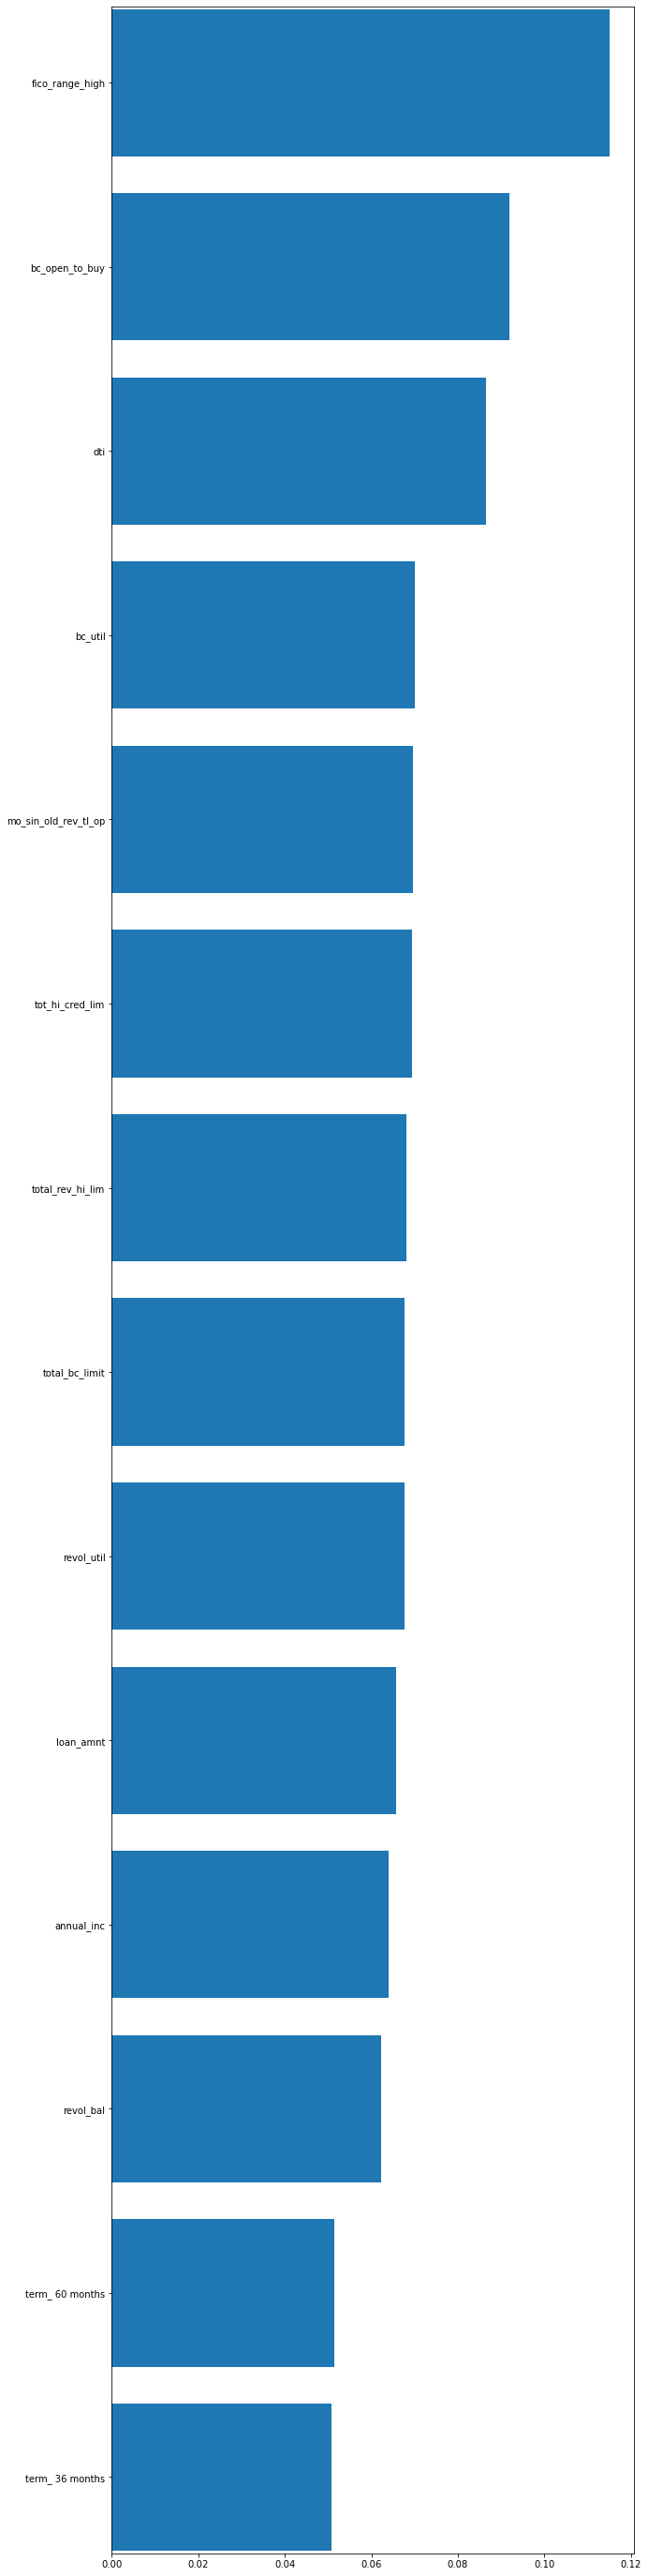

In [39]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

# Predictor ranking

In [40]:

r = permutation_importance(model, X_val, y_val,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")


NameError: name 'model' is not defined